# Task 1 - CycleGANS - Using an existing model

## Setup

In [ ]:
from google.colab import drive
import os
import re
import time 
import shutil
import glob
import filecmp
import zipfile

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from glob import glob
import random


import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

tfds.disable_progress_bar()
autotune = tf.data.AUTOTUNE

from IPython.display import clear_output as clear
!pip install tensorflow-addons
!pip install tensorflow_datasets
!pip install tensorflow keras
!pip install tensorflow
clear()

In [ ]:
## Connecting to google drive
drive.mount('/content/gdrive')

In [ ]:
%cd "gdrive/My Drive/DL_Coursework/Task1/"

/content/gdrive/My Drive/DL_Coursework/Task1


## Dataset Preparation

### Unzips a file to a specified destination path and renames the file if a new name is provided.


In [ ]:

def unzip_and_rename_file(file_path, new_name=None, dest_path=None):
    if dest_path is None:
        dest_path = os.path.dirname(file_path)

    if new_name is None:
        new_name = os.path.splitext(os.path.basename(file_path))[0].replace(" ", "_") + ".zip"
    
    os.rename(file_path, os.path.join(os.path.dirname(file_path), new_name))

    start_time = time.time()
    shutil.unpack_archive(os.path.join(os.path.dirname(file_path), new_name), dest_path)
    end_time = time.time()

    print(f'Time taken to unzip {file_path} : {end_time - start_time:.2f} seconds')

# Unzip and rename the 'cat_and_dog.zip' file
unzip_and_rename_file(file_path = 'cat_and_dog.zip', dest_path = 'cat_and_dog')

# Unzip and rename the 'cat_face.zip'
unzip_and_rename_file(file_path = 'cat_and_dog/cat_face.zip', dest_path = 'cat_and_dog/cat_face')

# Unzip and rename the 'dog faces.zip' file to 'dcat_face.zip'
unzip_and_rename_file(file_path = 'cat_and_dog/dog faces.zip', dest_path = 'cat_and_dog/dog_face')

# Unzip and rename the 'face_img.zip'
unzip_and_rename_file(file_path = 'face_img.zip', dest_path = 'face_img')

# Unzip and rename the 'face_align_celeba.zip'
unzip_and_rename_file(file_path = 'face_img/face_align_celeba.zip', dest_path = 'face_img')

# Unzip and rename the 'UTK Face Cropped.zip'
unzip_and_rename_file(file_path = 'face_img/UTK Face Cropped.zip', dest_path = 'face_img')


Time taken to unzip cat_and_dog.zip : 5.05 seconds
Time taken to unzip cat_and_dog/cat_face.zip : 19.58 seconds
Time taken to unzip cat_and_dog/dog faces.zip : 12.33 seconds
Time taken to unzip face_img.zip : 18.10 seconds
Time taken to unzip face_img/face_align_celeba.zip : 109.06 seconds
Time taken to unzip face_img/UTK Face Cropped.zip : 30.29 seconds


### Compare the images in both the folder

In [ ]:
folder1_path = 'face_img/utkcropped'
folder2_path = 'face_img/utkcropped/utkcropped'

folder1_files = os.listdir(folder1_path)
folder2_files = os.listdir(folder2_path)

match, mismatch, errors = filecmp.cmpfiles(folder1_path,folder2_path,folder1_files,folder2_files)

print(f'Match : {len(match)}')
print(f'Mismatch : {len(mismatch)}')

Match : 23709
Mismatch : 0


In [ ]:
folder_path = "face_img/utkcropped/utkcropped" # Replace with the full path to the folder you want to delete

# First, remove any read-only file attributes
for root, dirs, files in os.walk(folder_path):
    for dir in dirs:
        os.chmod(os.path.join(root, dir), 0o777)
    for file in files:
        os.chmod(os.path.join(root, file), 0o777)

# Next, delete the folder and all its contents
shutil.rmtree(folder_path, ignore_errors=True)

# Finally, remove any cached data associated with the folder (if applicable)
if os.path.exists(os.path.join(folder_path, ".cache")):
    shutil.rmtree(os.path.join(folder_path, ".cache"))

### Counting Number of Images

In [ ]:
def count_images(path):
    count = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    print(f'Total number of images in {path}: {count}')
#    return count

# Number of cat images 
count_images('cat_and_dog/cat_face/')

# Number of dog images 
count_images('cat_and_dog/dog_face/')

# Number of face - celebrarty images
count_images('face_img/img_align_celeba/')

# Number of face - celebrarty images
count_images('face_img/utkcropped/')

Total number of images in cat_and_dog/cat_face/: 29843
Total number of images in cat_and_dog/dog_face/: 19020
Total number of images in face_img/img_align_celeba/: 202599
Total number of images in face_img/utkcropped/: 23709


### Copying images from subfolders to a single folder

In [ ]:
def copy_images(source_path, destination_path):
    
    start_time = time.time()
    
    # Initialize a counter
    counter = 1
    
    # Loop through all subdirectories and files in the source folder
    for root, dirs, files in os.walk(source_path):
        for file in files:

            # Check if the file is a JPG or PNG image file
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):

                # Construct the source and destination paths
                source_file_path = os.path.join(root, file)

                # Create a unique destination file name by appending the counter to the file name
                destination_file_name = f"{os.path.splitext(file)[0]}_{counter}{os.path.splitext(file)[1]}"
                destination_file_path = os.path.join(destination_path, destination_file_name)

                # Increment the counter
                counter += 1

                # Create the destination folder if it doesn't exist
                os.makedirs(os.path.dirname(destination_file_path), exist_ok=True)

                # Copy the file to the destination folder
                shutil.copy(source_file_path, destination_file_path)
    end_time = time.time()

    print(f"Images copied successfully! Time taken to copy {source_path}: {end_time - start_time:.2f} seconds.")


# Copy the cat and dog images to the 'cat_dog' directory
copy_images('cat_and_dog/', 'cat_dog/')

# Copy the celebrity and cropped face images to the 'face' directory
copy_images('face_img/', 'face/')


Images copied successfully! Time taken to copy cat_and_dog/: 289.79 seconds.
Images copied successfully! Time taken to copy face_img/: 1211.82 seconds.


### Renaming file extensions to .jpg only

In [ ]:
def rename_files(dir_path):
    # Get a list of all the files in the directory
    files = os.listdir(dir_path)

    # Define the regular expression to match the old file extension
    old_ext_pattern1 = r'(.*)\.jpg\.chip_\d+\.jpg$'
    old_ext_pattern2 = r'(.*)jpg\.chip_\d+\.jpg$'

    # Loop through each file in the directory
    for filename in files:
        # Check if the file matches the old file extension pattern
        if re.match(old_ext_pattern1, filename):
            # Extract the part of the filename we want to keep
            new_filename = re.sub(old_ext_pattern1, r'\1.jpg', filename)
            # Rename the file
            os.rename(os.path.join(dir_path, filename), os.path.join(dir_path, new_filename))
        elif re.match(old_ext_pattern2, filename):
            # Extract the part of the filename we want to keep
            new_filename = re.sub(old_ext_pattern2, r'\1.jpg', filename)
            # Rename the file
            os.rename(os.path.join(dir_path, filename), os.path.join(dir_path, new_filename))

rename_files('face')

In [ ]:
# Number of cat_dog images 
count_images('cat_dog')

# Number of face images
count_images('face')

Total number of images in cat_dog: 48863
Total number of images in face: 226308


### Loading images

In [ ]:
## Face 
root_face_path = 'face'
face_paths = glob(root_face_path + '/*.jpg')
random.shuffle(face_paths)
face_train = face_paths[:200000]
face_tests = face_paths[200000:]

face_train = face_train[:5000]
face_tests = face_tests[:5000]

train_faces = tf.data.Dataset.from_tensor_slices(face_train)
test_faces = tf.data.Dataset.from_tensor_slices(face_tests)

# Cat Dog
root_cat_dog_path = 'cat_dog'
cat_dog_paths = glob(root_cat_dog_path + '/*.jpg')
cat_dog_paths += glob(root_cat_dog_path + '/*.png')
random.shuffle(cat_dog_paths)
cat_dog_train = cat_dog_paths[:20000]
cat_dog_tests = cat_dog_paths[40000:]

cat_dog_train = cat_dog_train[:5000]
cat_dog_tests = cat_dog_tests[:5000]

train_cat_dogs = tf.data.Dataset.from_tensor_slices(cat_dog_train)
test_cat_dogs = tf.data.Dataset.from_tensor_slices(cat_dog_tests)

# Final test Faces
root_face_path = 'Face_Test'
face_final_test = glob(root_face_path + '/*.jpg')
face_final_test += glob(root_face_path + '/*.jpeg')
random.shuffle(face_final_test)

test_face_final = tf.data.Dataset.from_tensor_slices(face_final_test)

### Create Dataset

In [ ]:
# Define the standard image size.
orig_img_size = (286, 286)
# Size of the random crops to be used during training.
input_img_size = (256, 256, 3)
# Weights initializer for the layers.
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization.
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

buffer_size = 256
batch_size = 1


# Define the preprocessing functions
def load_image(img):
    image_string = tf.io.read_file(img)
    image_ext = tf.strings.split(img, sep='.')[-1]
    # if tf.strings.regex_full_match(image_ext, '.jpg|.jpeg'):
    img = tf.image.decode_jpeg(image_string, channels=3)
    # elif tf.strings.regex_full_match(image_ext, '.png'):
        # img = tf.image.decode_png(image_string, channels=3)
    return img

def normalize_img(img):
    img = tf.cast(img, dtype=tf.float32)
    # Map values in the range [-1, 1]
    return (img / 127.5) - 1.0

def preprocess_train_image(img):
    # Load Image
    img = load_image(img)
    # Random flip
    img = tf.image.random_flip_left_right(img)
    # Resize to the original size first
    img = tf.image.resize(img, [*orig_img_size])
    # Random crop to 256X256
    img = tf.image.random_crop(img, size=[*input_img_size])
    # Normalize the pixel values in the range [-1, 1]
    img = normalize_img(img)
    return img

def preprocess_test_image(img):
    # Load Image
    img = load_image(img)
    # Only resizing and normalization for the test images.
    img = tf.image.resize(img, [input_img_size[0], input_img_size[1]])
    img = normalize_img(img)
    return img

## Create Dataset Objects

In [ ]:
# Apply the preprocessing operations to the training data
train_faces = (
    train_faces.map(preprocess_train_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)
train_cat_dogs = (
    train_cat_dogs.map(preprocess_train_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

# Apply the preprocessing operations to the test data
test_faces = (
    test_faces.map(preprocess_test_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)
test_cat_dogs = (
    test_cat_dogs.map(preprocess_test_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

# Applying the processing on final test data
test_face_final = (
    test_face_final.map(preprocess_test_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

### Visualise some samples

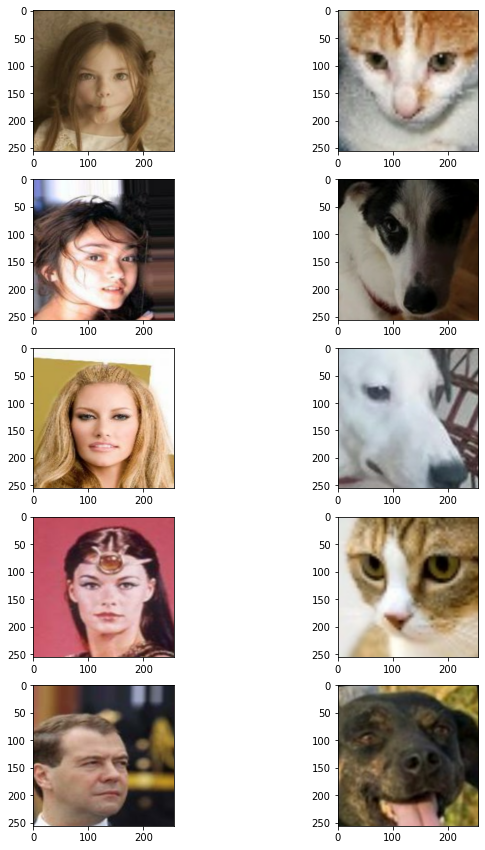

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(10, 15))
for i, samples in enumerate(zip(train_faces.take(5), train_cat_dogs.take(5))):
    face = (((samples[0][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    cat_dog = (((samples[1][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    ax[i, 0].imshow(face)
    ax[i, 1].imshow(cat_dog)
plt.show()


## Building blocks used in the CycleGAN generators and discriminators

In [ ]:

class ReflectionPadding2D(layers.Layer):
    """Implements Reflection Padding as a layer.

    Args:
        padding(tuple): Amount of padding for the
        spatial dimensions.

    Returns:
        A padded tensor with the same type as the input tensor.
    """

    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super().__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


### Build the Generators

The generator consists of downsampling blocks: nine residual blocks
and upsampling blocks. The structure of the generator is the following:

```
c7s1-64 ==> Conv block with `relu` activation, filter size of 7
d128 ====|
         |-> 2 downsampling blocks
d256 ====|
R256 ====|
R256     |
R256     |
R256     |
R256     |-> 9 residual blocks
R256     |
R256     |
R256     |
R256 ====|
u128 ====|
         |-> 2 upsampling blocks
u64  ====|
c7s1-3 => Last conv block with `tanh` activation, filter size of 7.
```

In [ ]:

def get_resnet_generator(
    filters=64,
    num_downsampling_blocks=2,
    num_residual_blocks=9,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model


### Build the discriminators

The discriminators implement the following architecture:
`C64->C128->C256->C512`

In [ ]:

def get_discriminator(
    filters=64, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")


### Build the CycleGAN model

We will override the `train_step()` method of the `Model` class
for training via `fit()`.

In [ ]:

class CycleGan(keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super().__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def call(self, inputs):
        return (
            self.disc_X(inputs),
            self.disc_Y(inputs),
            self.gen_G(inputs),
            self.gen_F(inputs),
        )

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super().compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def call(
        self,
        inputs,
        training = None,
        mask = None
        ):
        return self.disc_X(inputs), self.disc_Y(inputs), self.gen_G(inputs), self.gen_F(inputs)

    def train_step(self, batch_data):
        # x is face and y is cat_dog
        real_x, real_y = batch_data

        # For CycleGAN, we need to calculate different
        # kinds of losses for the generators and discriminators.
        # We will perform the following steps here:
        #
        # 1. Pass real images through the generators and get the generated images
        # 2. Pass the generated images back to the generators to check if we
        #    we can predict the original image from the generated image.
        # 3. Do an identity mapping of the real images using the generators.
        # 4. Pass the generated images in 1) to the corresponding discriminators.
        # 5. Calculate the generators total loss (adverserial + cycle + identity)
        # 6. Calculate the discriminators loss
        # 7. Update the weights of the generators
        # 8. Update the weights of the discriminators
        # 9. Return the losses in a dictionary

        with tf.GradientTape(persistent=True) as tape:
            # face to fake cat_dog
            fake_y = self.gen_G(real_x, training=True)
            # cat_dog to fake face -> y2x
            fake_x = self.gen_F(real_y, training=True)

            # Cycle (face to fake cat_dog to fake face): x -> y -> x
            cycled_x = self.gen_F(fake_y, training=True)
            # Cycle (cat_dog to fake face to fake cat_dog) y -> x -> y
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adverserial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }


### Create a callback that periodically saves generated images

In [ ]:

class GANMonitor(keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=4):
        self.num_img = num_img

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        for i, img in enumerate(test_faces.take(self.num_img)):
            prediction = self.model.gen_G(img)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")

            prediction = keras.preprocessing.image.array_to_img(prediction)
            prediction.save(
                "generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch + 1)
            )
        plt.show()
        plt.close()


## Train the end-to-end model

In [ ]:

# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.legacy.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.legacy.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.legacy.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.legacy.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)
# Callbacks
plotter = GANMonitor()
checkpoint_filepath = "./model_checkpoints/cyclegan_checkpoints.{epoch:03d}"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath
)

cycle_gan_model.compute_output_shape(input_shape=(None, 256, 256, 3))

# 20 minutes on a google collab pro plus.
cycle_gan_model.fit(
    tf.data.Dataset.zip((train_faces, train_cat_dogs)),
    epochs=90,
    callbacks=[plotter, model_checkpoint_callback],
)

## Testing the Model

Weights loaded successfully


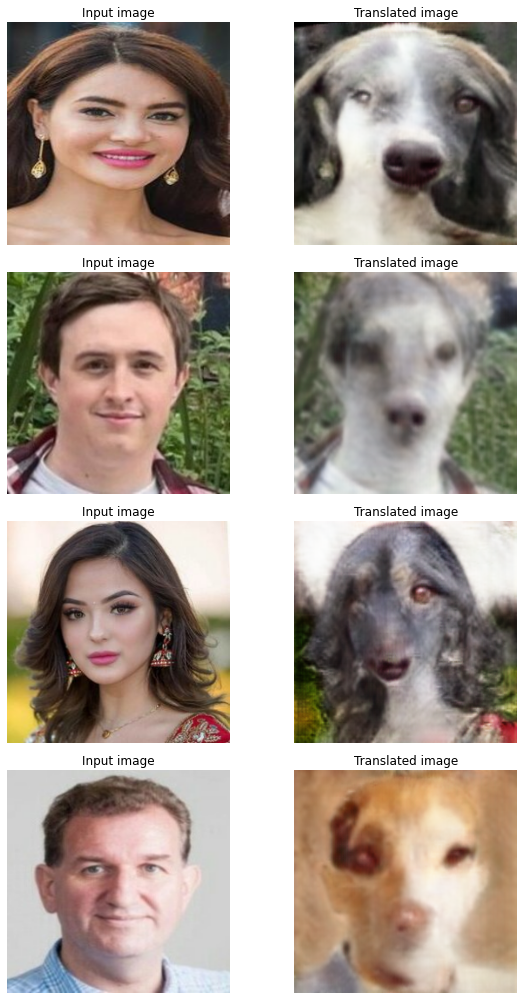

In [ ]:
# Load the checkpoints
weight_file = "cyclegan_checkpoints.090/cycle_gan.090"
cycle_gan_model.load_weights(weight_file).expect_partial()
print("Weights loaded successfully")

_, ax = plt.subplots(4, 2, figsize=(9, 14))
for i, img in enumerate(test_face_final.take(4)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()